In [151]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
from impl import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(150, 4)


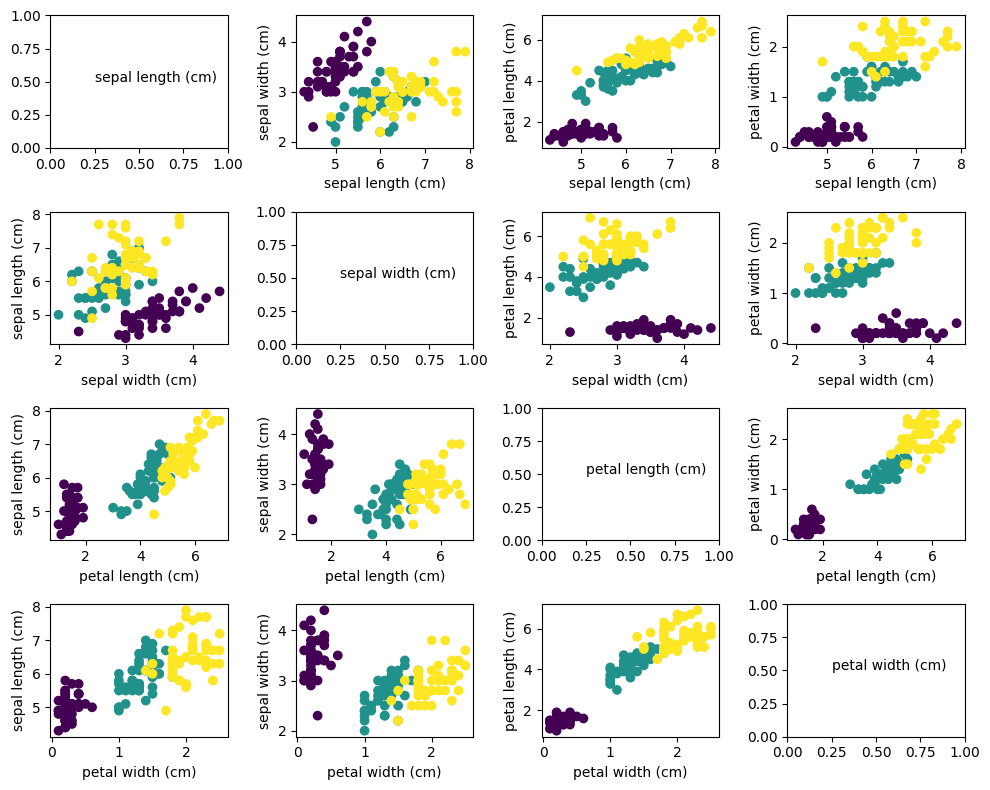

In [159]:
iris_ds = datasets.load_iris()
X = iris_ds.data
Y = iris_ds.target
f_names = iris_ds.feature_names

plt.figure(figsize=(10, 8), dpi=100)
plot_features_data(X, Y, f_names)

In [153]:
f_best = (2, 3)
f_best_names = (f_names[f_best[0]], f_names[f_best[1]])

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=20)

In [160]:
model = PotentialFunctionClassifier(10)
model.fit(train_x, train_y, 100)
pred = model.predict(test_x)

print("Accuracy on test: ", metrics.accuracy_score(test_y, pred))
print("Accuracy on train: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Accuracy on whole data: ", metrics.accuracy_score(Y, model.predict(X)))

Accuracy on test:  0.96
Accuracy on train:  1.0
Accuracy on whole data:  0.98


Charges of points:  [1 1 1 2 2 1 1 1 2 2 1 1 1 3 2 1 3 2 2 2 2 2 1]


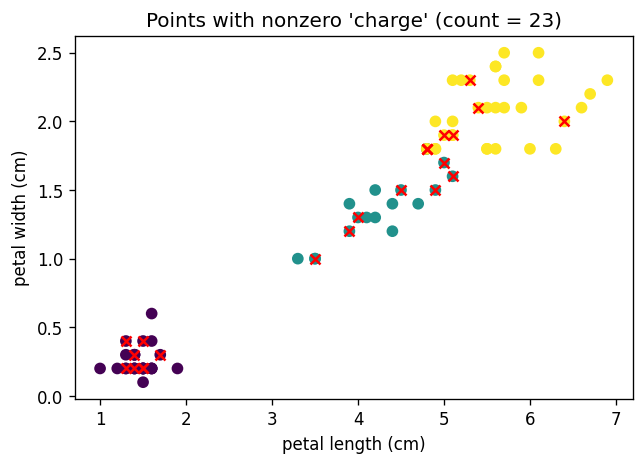

In [164]:
plt.figure(figsize=(6, 4), dpi=120)
plt.title(f"Points with nonzero 'charge' (count = {len(model.indexes)})")
plot_points(train_x[:, f_best[0]], train_x[:, f_best[1]], train_y, model.indexes, f_best_names)
print("Charges of points: ", model.charges)

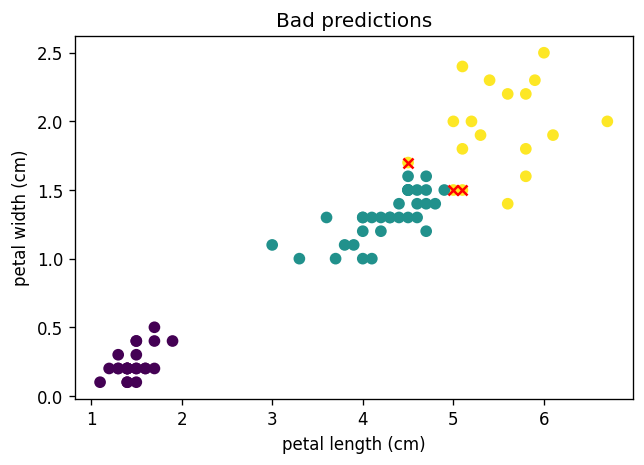

In [165]:
bad_pred_indices = [i for i, _ in  filter(lambda x: x[1], enumerate(pred != test_y))]

plt.figure(figsize=(6, 4), dpi=120)
plt.title("Bad predictions")
plot_points(test_x[:, f_best[0]], test_x[:, f_best[1]], test_y, bad_pred_indices, f_best_names)
